# **MACHINE LEARNING PROJECT TEMPLATE**

# 1 - DEFINE THE PROBLEM
Describe the business or research problem.  
Define the objective and desired output of the model.  
State whether the task is classification, regression, clustering, etc.  


# 2 - IMPORT REQUIRED LIBRARIES

Import other necessary libraries/packages based on the problem

## 2.1 - Base Libraries

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import shap
%pip install termcolor



from math import sqrt
from termcolor import colored

%pip install shap




Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 2.2 - ML/DL Libraries

In [34]:
from sklearn import preprocessing, metrics
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import KFold, cross_validate, cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# 3 - LOAD THE DATA
Loading the dataset from online source.

In [3]:
#s3-api = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'


# URL of the dataset
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'

# Loading  the data into a pandas DataFrame
df = pd.read_csv(url)



# 4 - EDA (Exploratory Data Analysis) of the DATA

## 4.1 - Basic Overview

In [4]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [5]:
# Display the first 5 rows of the DataFrame
df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
#statistical summary of the numerical features/columns
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
#summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [8]:
# the data type of each column
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object


In [9]:
#check for duplicate rows
print("Number of duplicate rows:")
print(df.duplicated().sum())

Number of duplicate rows:
0


In [10]:
#This removes all rows with missing (NaN) values from the DataFrame df, 
# and does so in place — meaning it modifies the original DataFrame directly (no need to assign it back).
df.dropna(inplace=True)

In [11]:
df.shape
# Display the first 5 rows of the DataFrame after dropping NaN values

(1067, 13)

## 4.2 - Check for Missing Values

In [12]:
# check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64


## 4.3 - Analyze Data Types

In [13]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

# 5 - VISUALIZE THE DATA

## 5.1 - UNIVARIATE ANALYSIS

### Example: Distribution of a numerical variable using seaborn and matplotlib  
Replace 'feature_name' with the column you want to analyze

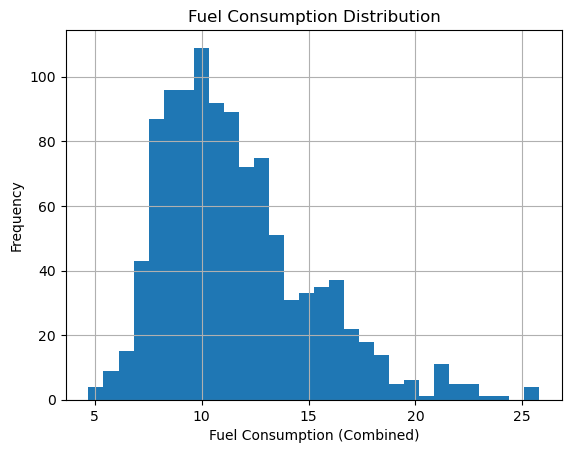

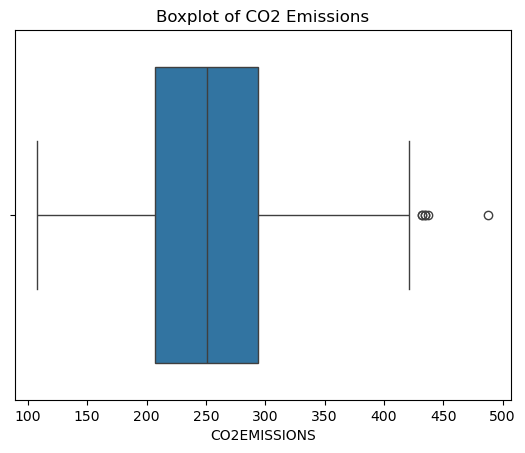

In [14]:

# Histogram for a numerical column, e.g., Fuel Consumption
df['FUELCONSUMPTION_COMB'].hist(bins=30)
plt.title("Fuel Consumption Distribution")
plt.xlabel("Fuel Consumption (Combined)")
plt.ylabel("Frequency")
plt.show()

# Boxplot for CO2 Emissions
sns.boxplot(x=df["CO2EMISSIONS"])
plt.title("Boxplot of CO2 Emissions")
plt.show()


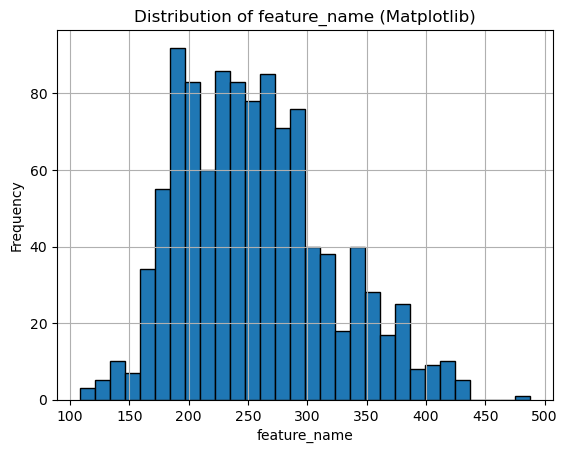

In [15]:
# Matplotlib histogram
plt.hist(df['CO2EMISSIONS'], bins=30, edgecolor='black')
plt.title("Distribution of feature_name (Matplotlib)")
plt.xlabel("feature_name")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

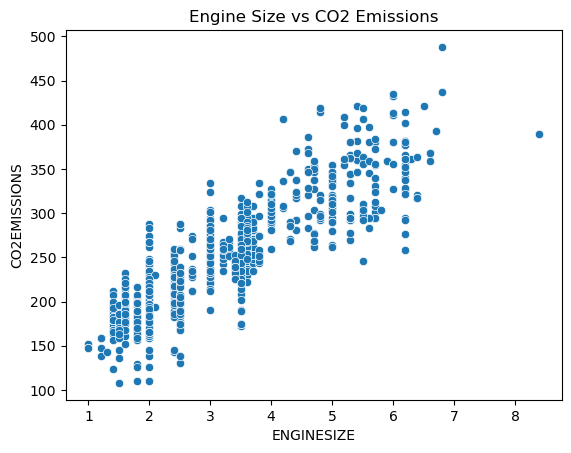

In [16]:
# Scatter plot between Engine Size and CO2 Emissions
sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df)
plt.title("Engine Size vs CO2 Emissions")
plt.show()



## 5.2 - BIVARIATE / MULTIVARIATE ANALYSIS

### Example: Scatter plot between two numerical variables

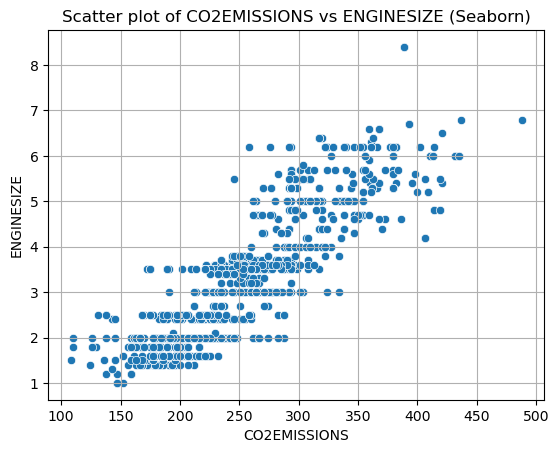

In [17]:
# Seaborn scatter plot
sns.scatterplot(x='CO2EMISSIONS', y='ENGINESIZE', data=df)
plt.title("Scatter plot of CO2EMISSIONS vs ENGINESIZE (Seaborn)")
plt.xlabel("CO2EMISSIONS")
plt.ylabel("ENGINESIZE")
plt.grid(True)
plt.show()

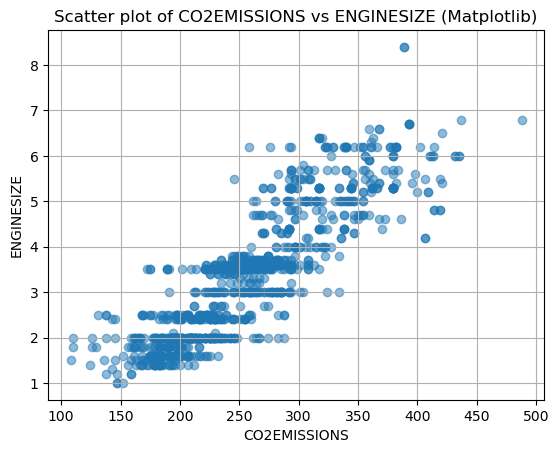

In [18]:
# Matplotlib scatter plot
plt.scatter(df['CO2EMISSIONS'], df['ENGINESIZE'], alpha=0.5)
plt.title("Scatter plot of CO2EMISSIONS vs ENGINESIZE (Matplotlib)")
plt.xlabel("CO2EMISSIONS")
plt.ylabel("ENGINESIZE")
plt.grid(True)
plt.show()

### Example: Correlation heatmap (Seaborn only, but with Matplotlib styling)

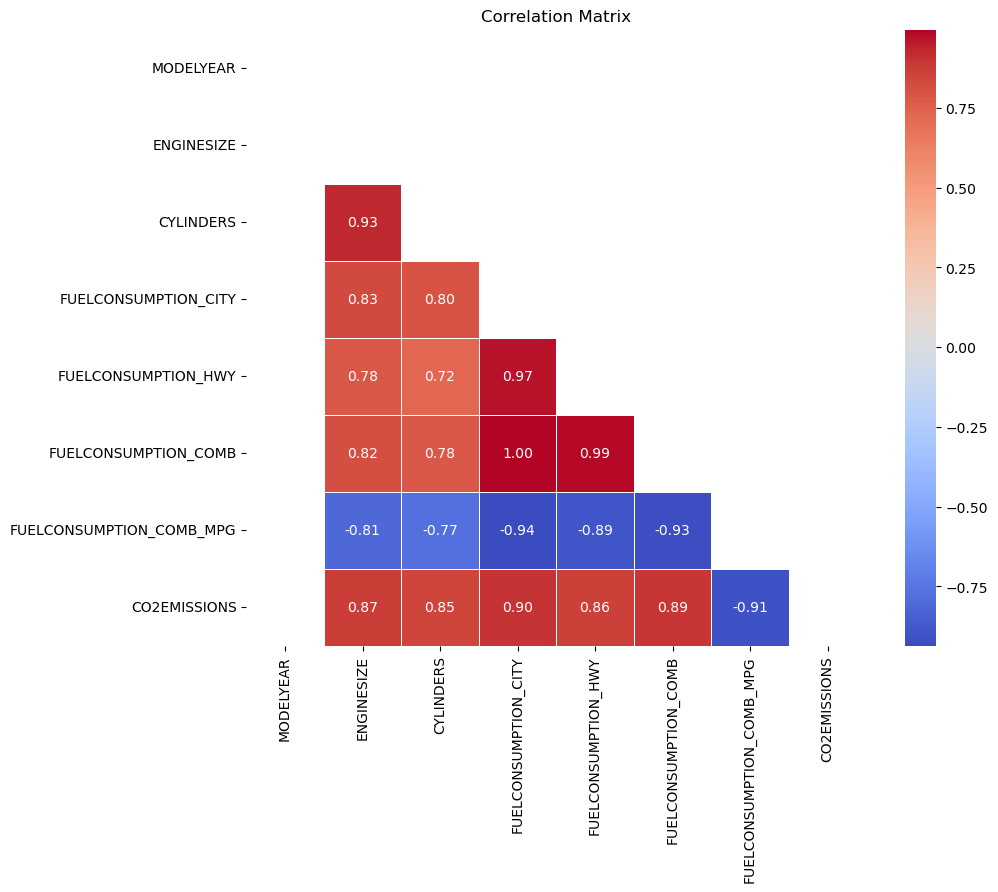

In [19]:
plt.figure(figsize=(10, 8))

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=[np.number])
mask = np.triu(np.ones_like(numerical_df.corr(), dtype=bool))

sns.heatmap(numerical_df.corr(), annot=True, mask=mask, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix")
plt.show()

# 6 - PRE-PROCESS THE DATA

## 6.1 - Handle Missing Values


In [20]:
df.fillna(method='ffill', inplace=True)

/var/folders/vg/h6w5pr055vs8qjjv0gccgp0c0000gn/T/ipykernel_59244/3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


## 6.2 - Encode Categorical Variables


In [21]:
df = pd.get_dummies(df, drop_first=True)

## 6.3 - Feature Scaling

In [22]:


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)  

# 7 - SPLIT THE DATA

## 7.1 - Separate features and target variable

In [23]:
# Replace 'target_column' with the actual name of your target variable
X = df.drop('CO2EMISSIONS', axis=1)
y = df['CO2EMISSIONS']

## 7.2 - Split the dataset into training and test sets

In [24]:
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=42
)

## 7.3 - Display dimensions to verify the split

In [25]:
print("Training feature set shape:", X_train.shape)
print("Test feature set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training feature set shape: (853, 746)
Test feature set shape: (214, 746)
Training labels shape: (853,)
Test labels shape: (214,)


# 8 - TRAIN A MODEL


In [38]:
model_SVR = SVR(kernel='linear')
# Using SVR with a linear kernel 
# Alternatively, you can use other regression models like Ridge, Lasso, etc.
# Fit the model to the training data
model_SVR.fit(X_train, y_train)


SVR(kernel='linear')

In [40]:
model_l = LinearRegression()
# Fit the model to the training data
model_l.fit(X_train, y_train)

LinearRegression()

In [27]:
import joblib

# Save the model
joblib.dump(model, 'knn_model.pkl')


['knn_model.pkl']

# 9 - EVALUATE AND TUNE THE MODEL

## 9.1 - Evaluate on Test Set

In [55]:

# Predict the target variable
y_pred_SVR = model_SVR.predict(X_test)
# Predict the target variable using the linear regression model
y_pred = model_l.predict(X_test)


In [60]:



# Evaluate the model using regression metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_l))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_l))
print("Root Mean Squared Error:", sqrt(mean_squared_error(y_test, y_pred_l)))
print("R2 Score:", r2_score(y_test, y_pred_SVR))

print( "\n") 

# Evaluate the model using regression metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_SVR))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_SVR))
print("Root Mean Squared Error:", sqrt(mean_squared_error(y_test, y_pred_SVR)))
print("R2 Score:", r2_score(y_test, y_pred_l))


Mean Squared Error: 104.1949154989814
Mean Absolute Error: 5.675834450975875
Root Mean Squared Error: 10.20759107228446
R2 Score: 0.9752706538095901


Mean Squared Error: 102.25449868425882
Mean Absolute Error: 5.2075590635119475
Root Mean Squared Error: 10.112096651251846
R2 Score: 0.9748013811635705


## 9.2 - Cross-Validation

In [54]:
scores_SVR = cross_val_score(model_SVR, X_train, y_train, cv=5)
scores_l = cross_val_score(model_l, X_train, y_train, cv=5)

print('CV Accuracy SVR:   ', scores_SVR.mean())
print('CV Accuracy Linear:', scores_l.mean())
print(scores_SVR.mean() - scores_l.mean())

CV Accuracy SVR:    0.958334802096932
CV Accuracy Linear: 0.9796440945667637
-0.02130929246983171


FINDINDING 


MAE, MSE, RMSE, R2, 

These are mathematical checkers on how good your model predicts by calculation 

for me they are check points on how best the prediction is given a certain model.

 #HAVE KNOWN what i know and what i dont know. so i will do more digging on these matrics just to know more behind the mathematical concept i am curious 


On my chosen dataset linear regression  performed better but doesn't always mean it will win in every case. 

why did it perform better. how did i drive my conclusion ?

i derive my conclusion based on the accuracy results. linear has higher score than SVR.

# 10 - INTERPRET RESULTS AND NEXT STEPS

## 10.1 - Interpret 

  0%|          | 0/50 [00:00<?, ?it/s]

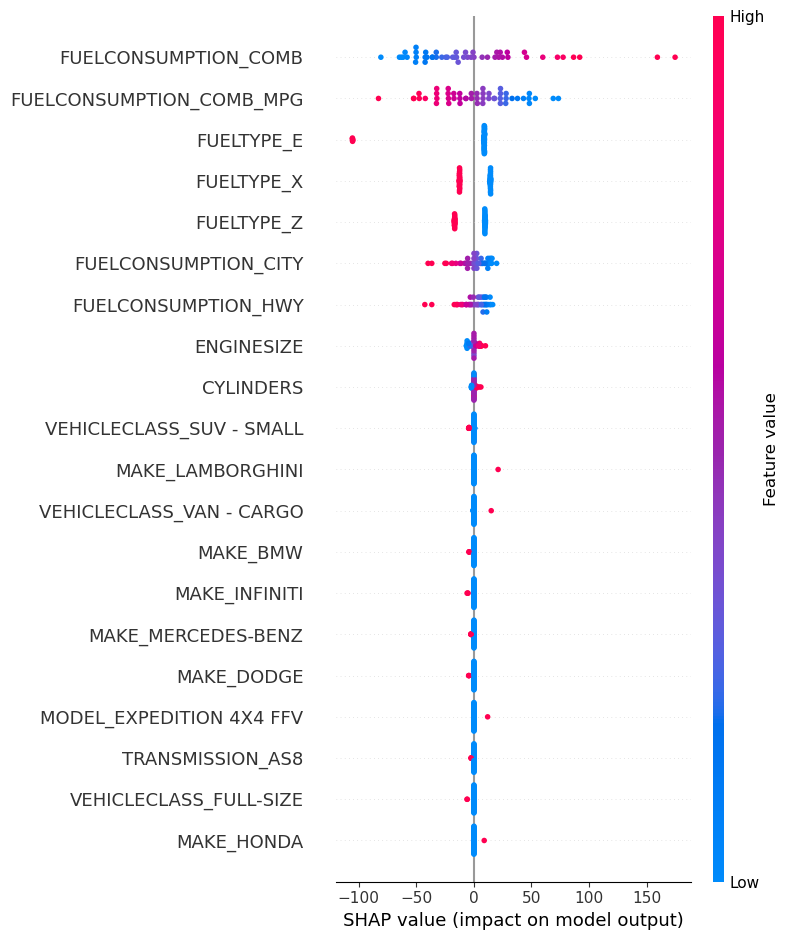

In [30]:


# Assuming your model and data are ready
# model: your trained KNN model
# X_train: training features (DataFrame or numpy array)
# X_test: testing features you want to explain

# Create a SHAP explainer using KernelExplainer (model-agnostic)
explainer = shap.KernelExplainer(model.predict, shap.sample(X_train, 100))

# Calculate SHAP values for a subset or full test data
shap_values = explainer.shap_values(X_test[:50])  # Explain first 50 test samples

# Plot summary plot (global feature importance)
shap.summary_plot(shap_values, X_test[:50], feature_names=X_test.columns)
